<a href="https://colab.research.google.com/github/A-Kowolik/Global_Energy_Sustainability/blob/main/Intial_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modules Used for Preliminary analysis

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt

Saving global-data-on-sustainable-energy.csv to global-data-on-sustainable-energy.csv


# Importing the dataset & Showcase

In [2]:
path = '/content/global-data-on-sustainable-energy.csv'
SustainEnergyDataCV = pd.read_csv(path)
SustainEnergyData = pd.DataFrame(data=SustainEnergyDataCV)
SustainEnergyData.head(5)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Cleaning Data

Column Rename

In [3]:
SustainEnergyData = SustainEnergyData.rename(columns = {"Density\\n(P/Km2)":"Density",
                                                        "Value_co2_emissions_kt_by_country":"CO2_Emissions(kT)",
                                                        "Financial flows to developing countries (US $)":"Financial_flow_developing_countries",
                                                        "Renewables (% equivalent primary energy)": "Renewables_%", "Land Area(Km2)":"Land_Area",
                                                        "Access to clean fuels for cooking": "Access_Clean_Fuels_for_Cooking", "Renewable-electricity-generating-capacity-per-capita":"Renewable_Electricity_Generating_Capacity_per_Capita",
                                                        "Renewable energy share in the total final energy consumption (%)":"Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%",
                                                        "Electricity from fossil fuels (TWh)": "Electricity_from_Fossil_Fuels_(TWh)", "Electricity from nuclear (TWh)":"Electricity_from_Nuclear(TWh)",
                                                        "Electricity from renewables (TWh)": "Electricity_from_Renewables(TWh)", "Low-carbon electricity (% electricity)":"Low-carbon_Electricity",
                                                        "Energy intensity level of primary energy (MJ/$2017 PPP GDP)":"Energy_Intensity_Levels_of_Primary_Energy"})

In [4]:
for col in SustainEnergyData:
  print(col)

Entity
Year
Access to electricity (% of population)
Access_Clean_Fuels_for_Cooking
Renewable_Electricity_Generating_Capacity_per_Capita
Financial_flow_developing_countries
Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%
Electricity_from_Fossil_Fuels_(TWh)
Electricity_from_Nuclear(TWh)
Electricity_from_Renewables(TWh)
Low-carbon_Electricity
Primary energy consumption per capita (kWh/person)
Energy_Intensity_Levels_of_Primary_Energy
CO2_Emissions(kT)
Renewables_%
gdp_growth
gdp_per_capita
Density
Land_Area
Latitude
Longitude


Dropping Columns

In [5]:
#removal of these columns are because they do not have bearing on the questions or in the case of
#Financial Flow Developing Countries, Renewable (% equivalent primary energy) they have over half of the data missing
SustainEnergyData = SustainEnergyData.drop(['Entity','Year','Density','Latitude', 'Longitude', "Land_Area", "Renewables_%", "Financial_flow_developing_countries"], axis=1)

In [6]:
for col in SustainEnergyData:
  print(col)

Access to electricity (% of population)
Access_Clean_Fuels_for_Cooking
Renewable_Electricity_Generating_Capacity_per_Capita
Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%
Electricity_from_Fossil_Fuels_(TWh)
Electricity_from_Nuclear(TWh)
Electricity_from_Renewables(TWh)
Low-carbon_Electricity
Primary energy consumption per capita (kWh/person)
Energy_Intensity_Levels_of_Primary_Energy
CO2_Emissions(kT)
gdp_growth
gdp_per_capita


Replacing NAs with Zeros

In [7]:
#Settign the NAs to Zeros since majority of columns have some missing data
Cleaned_SustainEnergyData = SustainEnergyData.fillna(0)

In [8]:
Cleaned_SustainEnergyData.isnull().sum()

Access to electricity (% of population)                       0
Access_Clean_Fuels_for_Cooking                                0
Renewable_Electricity_Generating_Capacity_per_Capita          0
Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%    0
Electricity_from_Fossil_Fuels_(TWh)                           0
Electricity_from_Nuclear(TWh)                                 0
Electricity_from_Renewables(TWh)                              0
Low-carbon_Electricity                                        0
Primary energy consumption per capita (kWh/person)            0
Energy_Intensity_Levels_of_Primary_Energy                     0
CO2_Emissions(kT)                                             0
gdp_growth                                                    0
gdp_per_capita                                                0
dtype: int64

In [9]:
Cleaned_SustainEnergyData["CO2_Emissions(kT)"] = Cleaned_SustainEnergyData["CO2_Emissions(kT)"].astype(float).astype(int)

# Spliting the data

In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is CO2_Emissions(kT)
class_col_name='CO2_Emissions(kT)'

feature_names=Cleaned_SustainEnergyData.columns[Cleaned_SustainEnergyData.columns != class_col_name]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(Cleaned_SustainEnergyData.loc[:, feature_names], Cleaned_SustainEnergyData[class_col_name], test_size=0.3,random_state=1)

# Decision Tree

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Visualization of Decision Tree

class Names ['760', '730', '1029', '1220', '1549', '1759', '1769', '3559', '4880', '7110', '8930', '8079', '5989', '5949', '5300', '4780', '6070', '6079', '0', '3170', '3230', '3759', '4070', '4250', '4030', '4010', '4139', '4079', '4219', '4449', '4849', '4360', '4440', '4820', '4619', '4480', '5139', '5110', '4829', '80050', '78650', '82400', '88190', '89489', '94190', '99809', '102750', '107750', '112169', '114180', '120790', '134929', '139020', '147740', '156270', '154910', '158339', '165539', '171250', '16200', '15960', '15689', '16760', '17450', '15810', '16559', '16969', '19280', '21149', '22799', '23870', '26959', '29629', '31649', '29760', '24250', '23959', '25209', '330', '350', '389', '409', '400', '439', '460', '479', '1389', '490', '540', '699', '469', '500', '509', '519', '132270', '125260', '117470', '127660', '141380', '145990', '154899', '162809', '167229', '156570', '167220', '176639', '177960', '183250', '179600', '185550', '183160', '179320', '176899', '168100', '35

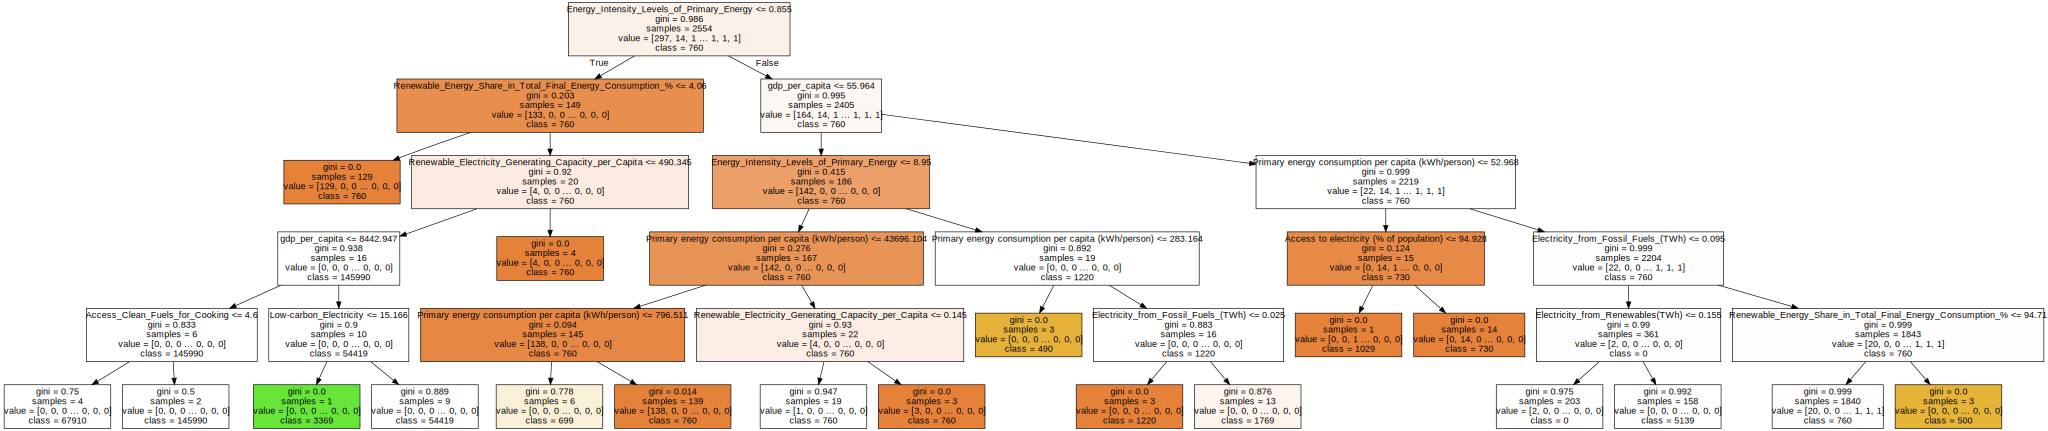

In [12]:
import graphviz
#Get unique class values to display on the tree
class_values=np.array(Cleaned_SustainEnergyData[class_col_name].unique()).astype('str').tolist()

print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph

# Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
test_set = (X_test, y_test)
IndVal = y_test
DepVal = X_test

#Fitting to model
Model_LR = LinearRegression().fit(DepVal, IndVal)

#Results
print('Coefficent of the Model:', Model_LR.coef_,'\n')
print('Intercept of the Model:', Model_LR.intercept_)

Coefficent of the Model: [ 3.33541730e+02 -4.38846364e+02 -2.38911166e+01 -3.24155038e+02
  2.09594532e+03 -6.23925857e+02  8.03801166e+02  4.24067263e+02
 -1.25924771e-01  4.76193810e+03  2.79806802e+03 -1.72659493e-01] 

Intercept of the Model: -42257.42278007002


In [14]:
#Predictions
Model_LR.predict(DepVal)

array([-22279.64377793, -49692.65079811,   9589.24963568, ...,
        48636.75229099,   -519.62239072,  28308.0418917 ])

In [15]:
#Variance
r2_score(y_true= IndVal,
         y_pred= Model_LR.predict(DepVal))

0.9676001939652727

In [16]:
from plotnine import ggplot, aes, geom_point, geom_line
from plotnine.themes import theme_minimal

Fitted = Model_LR.predict(X_test)
Fitted_df = pd.DataFrame(data=Fitted)

ggplot(aes(DepVal,IndVal),test_set) + geom_point(alpha = 0.5, color = "#2c3e50") +geom_line(aes(y= 'Fitted_df'), color = 'blue') + theme_minimal()

TypeError: ignored

# K-Means

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Scaling and Intializing a function for Identifying the Optimal amount of clusters for the data
scaler = StandardScaler()
Scaled_data = scaler.fit_transform(X_test)

def optim_k_means(data, max_k):
  means = []
  intertias = []
  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    intertias.append(kmeans.inertia_)

  fig = plt.subplots(figsize= (10, 5))
  plt.plot(means, intertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10

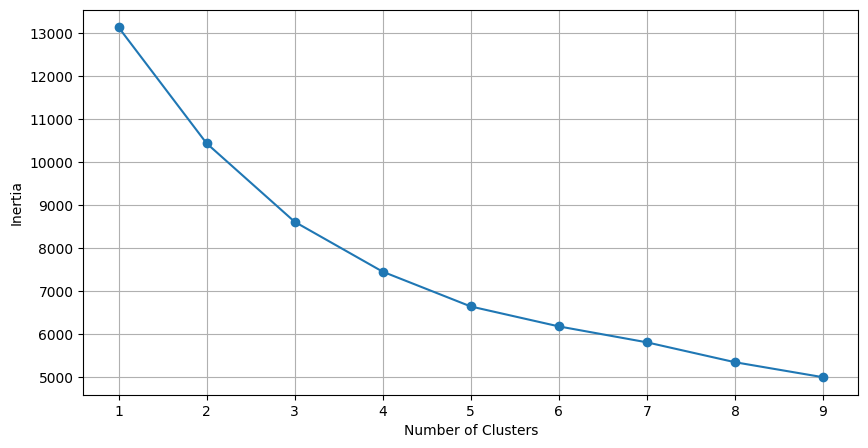

In [18]:
#Graphing the Optimal Amount of Clusters
optim_k_means(Scaled_data, 10)


In [19]:
#Apply K Means Clustering
kmeans = KMeans(n_clusters=4)

kmeans.fit(X_test)

X_test['kmeans_4'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


ValueError: ignored

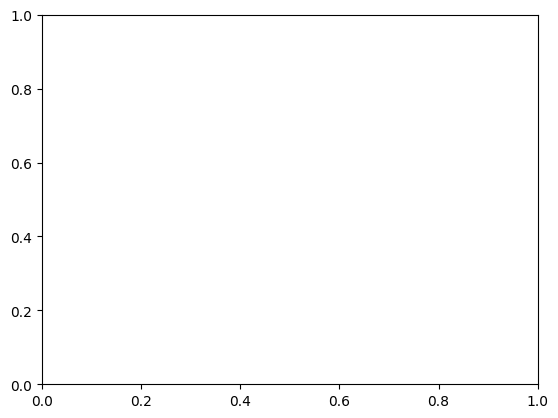

In [20]:
#Plotting Results
plt.scatter(x=X_test, y= X_test, c=X_test['kmeans_4'])
plt.show()